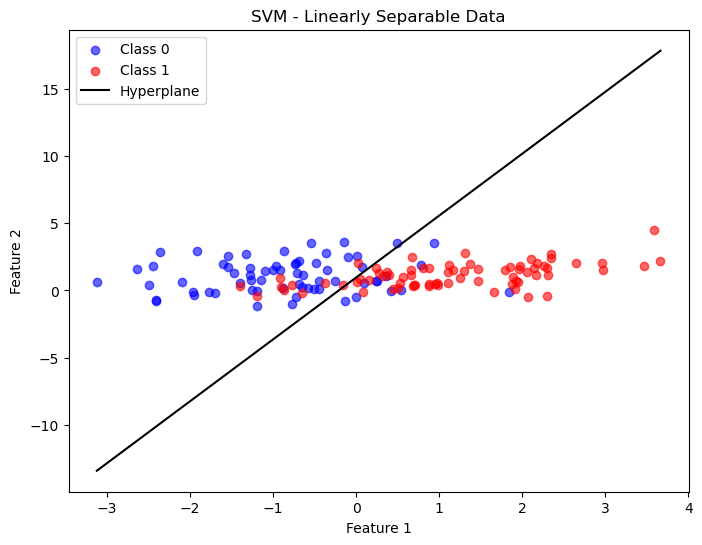

In [1]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Generate a linearly separable dataset
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM with a linear kernel
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)

# Visualize the hyperplane
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Class 1', alpha=0.6)

# Plot hyperplane
w = linear_svm.coef_[0]
b = linear_svm.intercept_[0]
x_hyperplane = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_hyperplane = -(w[0] * x_hyperplane + b) / w[1]

plt.plot(x_hyperplane, y_hyperplane, color='black', label='Hyperplane')
plt.title('SVM - Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


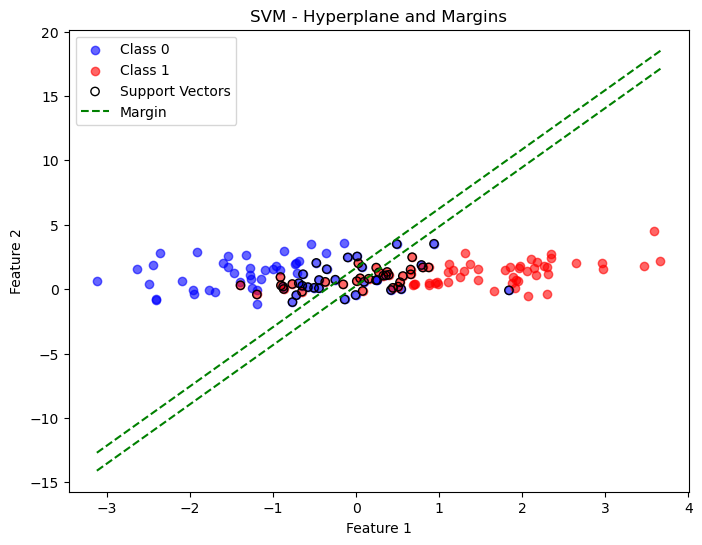

In [2]:
# Support vectors
support_vectors = linear_svm.support_vectors_

# Plot the margin
margin = 1 / np.sqrt(np.sum(linear_svm.coef_ ** 2))

plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Class 1', alpha=0.6)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], edgecolor='black', facecolor='none', label='Support Vectors')

# Margins
plt.plot(x_hyperplane, y_hyperplane + margin, color='green', linestyle='--', label='Margin')
plt.plot(x_hyperplane, y_hyperplane - margin, color='green', linestyle='--')

plt.title('SVM - Hyperplane and Margins')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


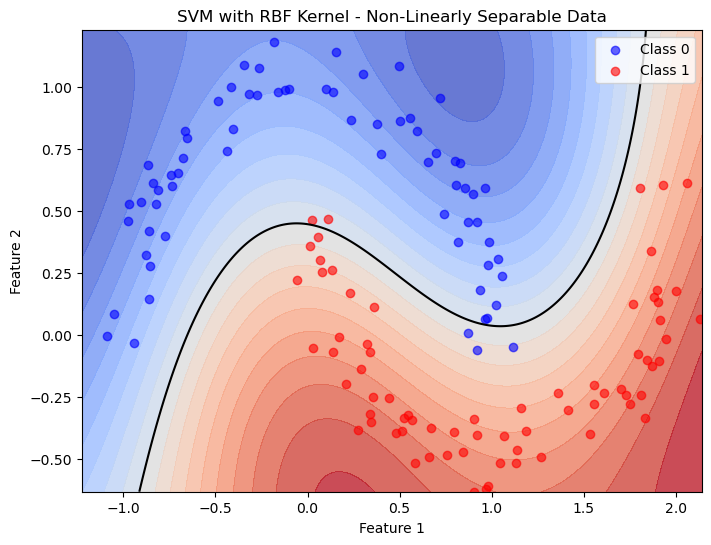

In [3]:
from sklearn.datasets import make_moons

# Generate non-linear data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', C=1, gamma=0.5)
rbf_svm.fit(X_train, y_train)

# Visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 500),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 500))
Z = rbf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.8)
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=1.5)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Class 1', alpha=0.6)
plt.title('SVM with RBF Kernel - Non-Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.5, 1]}

# Perform grid search
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train with best parameters
optimized_svm = grid_search.best_estimator_

# Evaluate the model
accuracy = optimized_svm.score(X_test, y_test)
print(f"Accuracy with optimized hyperparameters: {accuracy:.2f}")


Best Parameters: {'C': 10, 'gamma': 0.5}
Accuracy with optimized hyperparameters: 0.98


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        28

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



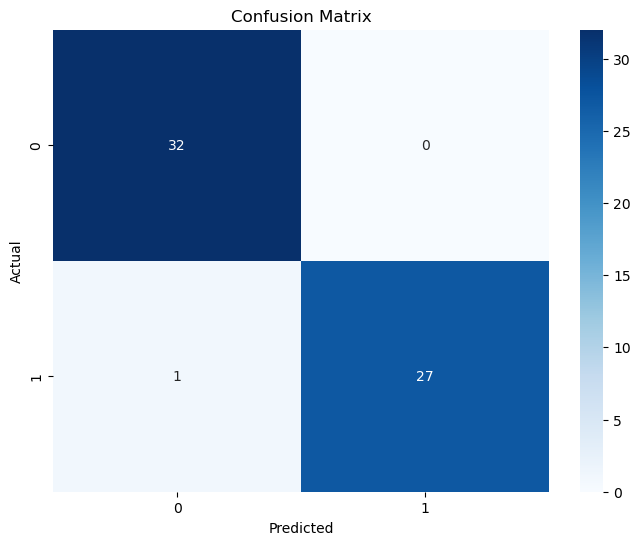

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions
y_pred = optimized_svm.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
